   #  MP307 Practical 2 Queueing Theory II

## Python functions for queue analysis

The Python functions contained in this notebook are:

1. `Nearneigh(pup,pdown,r)`. This generates the transition matrix $P$ stored in `P` for a simple nearest neighbour model with maximum size `r` and probability `pup` of one step up transition and  `pdown` for one step down transition. The output is the transition matrix.

2. `Equilibrium(P)`. This computes the equilibrium probabilities for a given transition matrix `P`. If the system is not ergodic then an error message appears. The output is an array.

3. `Queue(P,n0,nit)`. This simulates a queue for a given transition matrix `P` with initial queue size `n0` for `nit`  iterations. The output is a list of simulated queue data.

4. `Qplot(qdata,pi)`. `Qplot(qdata)` generates a histogram of the frequencies of the observed queue sizes in the input data list `qdata`. The second argument is optional and refers to the equilibrium probabilities `pi` (if they exist and have been calculated via `Equilibrium(P)` above or otherwise). The output of `Qplot(qdata,pi)` is the frequency histogram together with a plot of the equilibrium probabilities `pi`. 

In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import random as ran

In [2]:
def Nearneigh (pup, pdown, r):
    # This generates the transition matrix P for a nearest neighbour model with 
    # maximum size r and probability pup of one step up transition and pdown 
    # for one step down transition. 
    # The output is the transition matrix P.
    P = np.zeros((r + 1, r + 1))
    P[0, 0] = 1 - pup
    P[0, 1] = pup
    P[r , r ] = 1 - pdown
    P[r , r - 1] = pdown
    for i in range(1, r):
        P[i, i - 1] = pdown
        P[i , i] = 1 - pdown - pup
        P[i , i + 1] = pup
    return(P)


## Example. 
Find the transition matrix for a queue of maximum size 5 with prob customer arrival=0.2 and prob customer servicing=0.3

In [3]:
P=Nearneigh(0.2,0.3,5)
print(P)

[[0.8 0.2 0.  0.  0.  0. ]
 [0.3 0.5 0.2 0.  0.  0. ]
 [0.  0.3 0.5 0.2 0.  0. ]
 [0.  0.  0.3 0.5 0.2 0. ]
 [0.  0.  0.  0.3 0.5 0.2]
 [0.  0.  0.  0.  0.3 0.7]]


In [4]:
def Equilibrium (P):
    # This computes the equilibrium probabilities pi for a given transition matrix P. 
    # If the system is not ergodic then an error message appears. 
    # The output is an array.
    degenflag = 0
    n = len(P)
    pi = np.zeros((n))
    for i in range(n):
        if float(sum(P[i,:]))!= 1.0:
            print("ERROR: row",i,"of P does not sum to 1 !")
    eigenvals, eigenvects=np.linalg.eig(P.transpose()) # eigendata for P transpose
    for k in range(n):
        if abs(eigenvals[k]-1)< 1.0e-14:
            degenflag = degenflag + 1
            k1=k # label for eigenvalue 1.
    if 1 < degenflag:
        print("ERROR: P is not Ergodic")
    else:
        v=eigenvects[:,k1]
        pi=v/sum(v)
    return(pi.real)

In [5]:
pi=Equilibrium(P)
print(pi)

[0.36541353 0.24360902 0.16240602 0.10827068 0.07218045 0.0481203 ]


In [6]:
def Queue (P, n0, nit):
# This simulates a queue for a given transition matrix P with initial queue size n0 for nit iterations. 
# The output is a list of simulated queue data.
    nP = len(P)
# pp is a relabelled transition matrix with row elements in decreasing order.
# This is used to speed up the simulation process
# The relabelling is stored in the matrix loc.
    pp = np.zeros((nP,nP))
    for i in range(nP):
        for j in range(nP):
            pp[i, j] = P[i, j]
    loc = np.array([list(range(nP))]*nP)
    for i in range(nP):
        for j in range(nP-1):
            maxpp = pp[i, j]
            kmax = j
            for k in range(j, nP):
                if maxpp < pp[i, k]:
                    maxpp = pp[i, k]
                    kmax = k
                    pp[i, j], pp[i, k] = pp[i, k], pp[i, j]
                    loc[i, j], loc[i, k] = loc[i, k], loc[i, j]
    n = n0
    qseq = [n0]
    if n0 < 0 or nP-1 < n0:
        print("ERROR: inputted initial Q size : Qsize<0 or Qsize>",nP-1)
    for m in range(nit):
        x = ran.random() # generates uniform random no on [0,1] 
        k = 0
        x1 = pp[n, k]
        while (x1 < x):
            k = k + 1
            x1 = x1 + pp[n, k]
        n = loc[n, k] 
        qseq = qseq + [n]
    return(qseq)

In [7]:
print(P) # For the transition matrix in our example above

[[0.8 0.2 0.  0.  0.  0. ]
 [0.3 0.5 0.2 0.  0.  0. ]
 [0.  0.3 0.5 0.2 0.  0. ]
 [0.  0.  0.3 0.5 0.2 0. ]
 [0.  0.  0.  0.3 0.5 0.2]
 [0.  0.  0.  0.  0.3 0.7]]


### Simulate 1000 steps with intial state 2 for given P

In [8]:
qdata=Queue(P,2,1000) 
print(qdata)

[2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 3, 3, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 2, 2, 1, 2, 3, 3, 4, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 4, 4, 4, 3, 3, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 3, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 5, 5, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 4, 3, 4, 5, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 3, 4, 5, 5, 4, 3, 3, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [9]:
len(qdata) # notice there are 1001 data pts for 1000 steps

1001

In [10]:
def Qplot(qdata,pi=0):
    Npoints=len(qdata)
    qmax=max(qdata)

    #histogram bins
    shift = lambda x: x-1/2    
    inbins=list(map(shift,list(range(qmax+2)))) # bins -1/2,1/2,3/2,...
    n,bins  = np.histogram(qdata, bins=inbins)

    freq=np.array(n)/Npoints 

    # get the corners of the rectangles for the histogram

    left = bins[:-1]
    right = bins[1:]  
    bottom = np.zeros(len(left))
    top = bottom + freq
    nrects = len(left)

    # Here comes the tricky part -- we have to set up the vertex and path codes
    # arrays using `.Path.MOVETO`, `.Path.LINETO` and `.Path.CLOSEPOLY` for each rect.

    #* We need 1 ``MOVETO`` per rectangle, which sets the initial point.
    #* We need 3 ``LINETO``'s, which tell Matplotlib to draw lines from
    #  vertex 1 to vertex 2, v2 to v3, and v3 to v4.
    #* We then need one ``CLOSEPOLY`` which tells Matplotlib to draw a line from
    #  the v4 to our initial vertex (the ``MOVETO`` vertex), in order to close the
    #  polygon.

    #<div class="alert alert-info"><h4>Note</h4><p>The vertex for ``CLOSEPOLY`` is ignored, but we still need a placeholder
    #  in the ``verts`` array to keep the codes aligned with the vertices.</p></div>

    nverts = nrects * (1 + 3 + 1)
    verts = np.zeros((nverts, 2))
    codes = np.full(nverts, path.Path.LINETO)
    codes[0::5] = path.Path.MOVETO
    codes[4::5] = path.Path.CLOSEPOLY
    verts[0::5, 0] = left
    verts[0::5, 1] = bottom
    verts[1::5, 0] = left
    verts[1::5, 1] = top
    verts[2::5, 0] = right
    verts[2::5, 1] = top
    verts[3::5, 0] = right
    verts[3::5, 1] = bottom

    #patch = None

    fig, ax = plt.subplots()
    barpath = path.Path(verts, codes)
    patch = patches.PathPatch(
        barpath, facecolor='red', edgecolor='black', alpha=1)
    ax.add_patch(patch)

    if not type(pi) is int:
        for m in range(len(pi)):
            heightpi=pi[m]
            widthpi=1
            rectpi = Rectangle((m-1/2, 0), widthpi, heightpi, fc='white', ec ='black',lw = 2, alpha=0.5) 
            ax.add_patch(rectpi)
    ax.set_xlim(-1/2, qmax+1/2) 
    ymax=max(freq)*1.5
    ax.set_ylim(0, ymax)

    plt.show()

### Plot histogram of frequency of queue sizes in given data

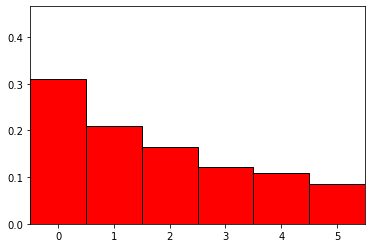

In [11]:
Qplot(qdata)

### Add plot of equilibrium probabilities $\pi$ (if known). As sample size increases the frequency equilibrium plots converge. 

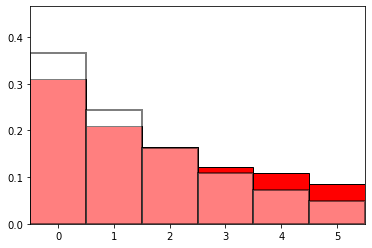

In [12]:
Qplot(qdata,pi)

## Q.1 (*) 
Simulate the Markov process with transition matrix: 
$$
\begin{bmatrix} 
1/2 & 0 & 1/2 & 0 & 0 & 0 \\ 
0 & 1/2 & 0 & 1/2 & 0 & 0 \\ 
0 & 0 & 1/2 & 0 & 1/2 & 0 \\ 
0 & 1/4 & 0 & 1/2 & 0 & 1/4 \\ 
1/4 & 0 & 1/4 & 0 & 1/2 & 0 \\ 
0 & 0 & 0 & 1/2 & 0 & 1/2%
\end{bmatrix}
$$

This is the same example as in Q.3 of Practical 1. Observe the long-time behaviour for initial queue size 0 and initial queue size 1. 

Observe what happens if the first row of the transition matrix is changed to $[1/4 , 1/4 , 1/2 , 0 , 0 , 0]$

In [13]:
P=np.array([
    [1/2,0,1/2,0,0,0],
    [0,1/2,0,1/2,0,0],
    [0,0,1/2,0,1/2,0],
    [0,1/4,0,1/2,0,1/4],
    [1/4,0,1/4,0,1/2,0],
    [0,0,0,1/2,0,1/2]
    ])
print(P)

[[0.5  0.   0.5  0.   0.   0.  ]
 [0.   0.5  0.   0.5  0.   0.  ]
 [0.   0.   0.5  0.   0.5  0.  ]
 [0.   0.25 0.   0.5  0.   0.25]
 [0.25 0.   0.25 0.   0.5  0.  ]
 [0.   0.   0.   0.5  0.   0.5 ]]


In [14]:
qdata=Queue(P,0,1000)  # 1000 iterations with initial state 0

In [15]:
print(qdata)

[0, 0, 2, 2, 4, 4, 0, 0, 2, 2, 4, 0, 0, 2, 2, 4, 4, 0, 0, 0, 0, 2, 4, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 0, 2, 4, 0, 0, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 0, 2, 4, 0, 0, 0, 0, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 0, 2, 2, 4, 4, 2, 4, 2, 4, 4, 0, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 0, 2, 2, 4, 0, 0, 2, 4, 2, 4, 4, 2, 4, 0, 2, 4, 4, 0, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 0, 2, 2, 2, 4, 0, 0, 2, 4, 4, 4, 4, 2, 4, 4, 0, 0, 2, 2, 2, 2, 4, 4, 4, 0, 0, 2, 2, 4, 4, 0, 2, 4, 4, 4, 4, 4, 0, 2, 4, 4, 4, 0, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 0, 0, 0, 2, 4, 4, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 0, 0, 0, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 2, 4, 0, 2, 4, 4, 0, 0, 2, 4, 0, 0, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 0, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 0, 0, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 

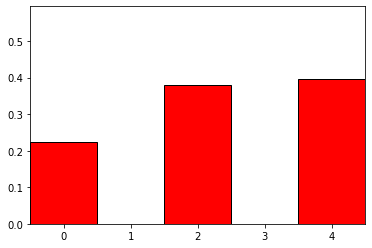

In [16]:
Qplot(qdata)

# Start with 1 in the queue

In [17]:
qdata=Queue(P,1,1000)

In [18]:
print(qdata)

[1, 1, 3, 1, 3, 3, 3, 3, 5, 3, 5, 5, 5, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 5, 3, 1, 3, 5, 5, 5, 5, 5, 3, 3, 3, 1, 3, 3, 5, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 5, 5, 3, 3, 3, 1, 1, 3, 5, 5, 3, 3, 1, 3, 5, 3, 3, 5, 3, 1, 1, 3, 5, 3, 3, 1, 1, 1, 3, 5, 5, 3, 3, 5, 5, 5, 5, 5, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 3, 1, 3, 3, 1, 1, 3, 5, 5, 5, 5, 3, 1, 1, 3, 3, 5, 5, 5, 5, 3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 5, 5, 3, 3, 3, 3, 5, 3, 5, 3, 3, 3, 5, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 5, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 5, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 5, 5, 5, 3, 5, 3, 1, 1, 3, 3, 3, 3, 3, 5, 3, 3, 1, 1, 3, 1, 3, 3, 3, 5, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 5, 5, 3, 1, 1, 3, 5, 3, 3, 5, 3, 5, 5, 3, 3, 3, 3, 3, 1, 3, 5, 5, 3, 3, 3, 3, 5, 3, 5, 3, 3, 5, 5, 5, 3, 1, 3, 1, 1, 3, 5, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 5, 5, 3, 3, 

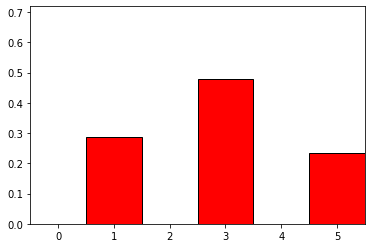

In [19]:
Qplot(qdata)

## Q.2(*)
A queue is observed 1000 time intervals with data as given in the array `qdata` below. 
This is the same as Question 4 of Practical 1.

Compare the actual frequencies of events with a simulated one. Use the probabilities found in Practical 1. 

Look at that question again for examples of do loops and if else statements in Python

In [20]:
qdata = [4, 5, 6, 6, 6, 7, 6, 7, 6, 5, 4, 4, 5, 6, 7, 6, 5, 4, 3, 4, 5, 6, 5, 4, 3, 2, 1, 2, 3, 2, 1, 
         2, 3, 4, 3, 2, 3, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 3, 4, 5, 4, 5, 6, 7, 
         8, 7, 6, 7, 6, 6, 5, 4, 5, 4, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 2, 3, 3, 4, 5, 6, 7, 6, 5, 6, 5, 
         6, 5, 6, 5, 4, 5, 4, 3, 4, 3, 4, 3, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 3, 3, 2, 3, 4, 3, 2, 
         3, 2, 1, 2, 3, 2, 3, 2, 1, 0, 0, 1, 1, 2, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 
         1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 5, 6, 7, 7, 6, 5, 4, 3, 4, 3, 3, 4, 3, 2, 3, 2, 3, 2, 1, 2, 1, 
         2, 1, 0, 0, 0, 0, 1, 2, 3, 2, 2, 3, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 
         0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 3, 2, 3, 3, 4, 5, 6, 5, 4, 3, 2, 1, 2, 
         1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 
         1, 0, 0, 1, 2, 3, 2, 3, 2, 2, 3, 4, 4, 5, 4, 3, 2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 2, 3, 2, 1, 2, 
         1, 0, 1, 0, 1, 2, 3, 3, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 1, 0, 1, 2, 1, 2, 3, 4, 4, 3, 
         2, 2, 1, 2, 3, 4, 5, 4, 4, 5, 4, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 
         1, 2, 2, 3, 2, 3, 4, 5, 6, 5, 6, 5, 4, 5, 6, 7, 6, 5, 6, 6, 7, 6, 7, 7, 6, 7, 6, 5, 4, 5, 5, 
         4, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 4, 3, 4, 5, 6, 5, 4, 3, 3, 4, 3, 2, 3, 2, 3, 3, 2, 1, 
         2, 1, 0, 0, 0, 0, 0, 1, 2, 3, 2, 3, 4, 5, 6, 7, 7, 8, 9, 8, 9, 8, 7, 6, 5, 5, 4, 5, 4, 3, 2, 
         1, 0, 1, 2, 1, 2, 3, 4, 5, 6, 7, 7, 8, 7, 8, 9, 8, 7, 6, 5, 4, 3, 4, 3, 4, 4, 5, 4, 3, 4, 3, 
         2, 3, 2, 3, 3, 2, 1, 1, 0, 1, 2, 1, 2, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 
         3, 2, 1, 0, 0, 1, 2, 3, 4, 3, 2, 3, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 6, 7, 7, 
         6, 7, 8, 8, 9, 10, 9, 10, 9, 10, 11, 10, 9, 8, 9, 10, 11, 10, 10, 9, 10, 10, 9, 8, 7, 8, 9, 10,
         9, 8, 7, 6, 7, 6, 7, 6, 5, 4, 4, 5, 4, 3, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 
         0, 0, 1, 0, 0, 1, 0, 1, 2, 3, 2, 3, 2, 3, 4, 3, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 3, 2, 
         2, 2, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 3, 2, 3, 4, 5, 5, 4, 3, 4, 3, 4, 5, 4, 3, 2, 1, 0, 1, 2, 
         3, 4, 3, 2, 3, 4, 3, 2, 3, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 5, 6, 5, 4, 5, 
         6, 5, 4, 3, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 3, 4, 3, 4, 3, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 
         4, 3, 4, 4, 5, 6, 7, 6, 7, 7, 6, 5, 4, 3, 4, 3, 2, 2, 3, 4, 3, 4, 3, 2, 1, 0, 0, 1, 2, 3, 2, 
         1, 2, 3, 2, 1, 0, 0, 0, 0, 1, 1, 2, 3, 2, 3, 2, 3, 4, 5, 6, 5, 5, 4, 3, 4, 5, 4, 3, 4, 5, 4, 
         3, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 3, 2, 3, 2, 3, 3, 4, 
         3, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 1, 0, 
         0, 0, 1, 2, 2, 3, 3, 2, 3, 4, 3, 2, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 4, 5, 6, 7, 7, 6, 5, 4, 
         5, 4, 5, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 4, 3, 2, 3, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 
         0, 1, 2, 2, 3, 2, 1, 0, 1, 2, 3, 4, 4, 3, 4, 3, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 
         0, 0, 1, 0, 1, 2, 2, 3, 3, 4, 3, 2, 3, 2, 1, 0, 0, 1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 1, 0, 
         1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 0]

In [21]:
#Set max to max of actual data + 1
N = len(qdata)
nup=0 # nup counts no of up steps
ndown=0 # ndown counts no of down steps
n0 = 0

for i in range(1,N):
    if qdata[i]>qdata[i-1]:
        nup=nup+1
    elif qdata[i]<qdata[i-1]:
        ndown=ndown+1
    
    if qdata[i-1] == 0:
        n0 += 1;

p1 = nup/(N-1)
p2 = ndown/(N-1-n0)

P=Nearneigh(p1,p2,max(qdata) + 1)
print(P)

[[0.58258258 0.41741742 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.50784077 0.07474181 0.41741742 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.50784077 0.07474181 0.41741742 0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.50784077 0.07474181 0.41741742 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.50784077 0.07474181 0.41741742
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.50784077 0.07474181
  0.41741742 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.50784077
  0.07474181 0.41741742 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0. 

In [22]:
pi=Equilibrium(P)
print(pi)

[0.19315028 0.15875899 0.13049123 0.10725668 0.08815914 0.072462
 0.05955982 0.04895492 0.04023827 0.03307367 0.02718475 0.02234438
 0.01836586]


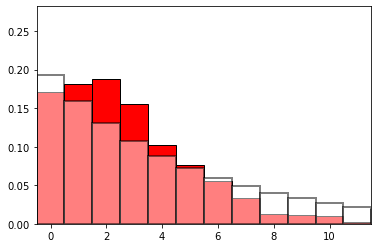

In [23]:
#Actual seen data plot
Qplot(qdata, pi)

In [24]:
#Start at qdata[0]
qdata=Queue(P,qdata[0],1000) 
print(qdata)

[4, 3, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5, 6, 7, 6, 5, 6, 5, 4, 3, 4, 5, 4, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 4, 5, 4, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 5, 6, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 8, 9, 10, 9, 10, 11, 10, 11, 10, 9, 8, 7, 8, 9, 8, 9, 10, 9, 10, 9, 10, 11, 10, 9, 9, 8, 9, 10, 11, 10, 11, 10, 11, 10, 11, 12, 11, 10, 9, 8, 7, 6, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 10, 11, 12, 11, 12, 11, 10, 11, 10, 11, 10, 9, 10, 9, 9, 8, 7, 7, 6, 6, 7, 6, 5, 4, 5, 4, 3, 4, 5, 6, 6, 7, 8, 8, 9, 8, 9, 8, 8, 7, 6, 5, 6, 5, 4, 5, 4, 3, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 3, 2, 3, 2, 3, 4, 5, 4, 5, 6, 5, 4, 5, 6, 7, 6, 5, 4, 5, 6, 5, 5, 4, 4, 3, 4, 4, 4, 5, 4, 3, 2, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 

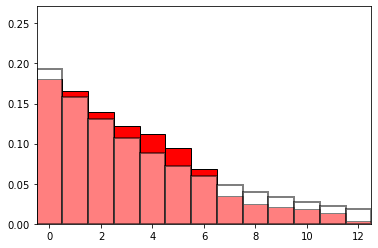

In [25]:
#Simulated data plot
Qplot(qdata, pi)

## Q.3(*)
A queue is observed 10000 time intervals with data as given in the array `qdata` below. 
This is the same as Question 5 of Practical 1.

(a) Construct a simple model for this queue as a Markov chain with only nearest neighbour interactions.
 1. Estimate the transition probabilities.
 2. What is the expected behaviour of the queue as time continues?
 3. Is the system ergodic ?

(b) Suppose that the time step used is known to be 10 sec.
 1. What is the average waiting time for customer service/arrival?
 2. What is average number of servicings/arrivals per minute?

(c) Simulate this system and compare the actual frequencies of events with the simulated ones.
  
  


In [26]:
qdata = [5, 5, 5, 6, 5, 6, 6, 7, 6, 5, 6, 5, 4, 5, 6, 6, 6, 7, 8, 7, 6, 6, 6, 5, 4, 4, 5, 5, 4, 5, 6, 6, 5, 4, 3, 3, 2, 2, 1, 2, 2, 3, 3, 2, 3, 4, 3, 2, 3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 6, 7, 6, 5, 4, 4, 3, 3, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 3, 4, 4, 3, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 2, 1, 2, 1, 2, 1, 2, 3, 4, 5, 5, 6, 5, 6, 5, 4, 4, 4, 3, 2, 2, 1, 2, 2, 3, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 3, 4, 3, 2, 1, 2, 3, 3, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 3, 4, 5, 6, 6, 7, 6, 5, 4, 5, 5, 4, 3, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 3, 2, 1, 2, 3, 2, 3, 4, 4, 4, 5, 6, 7, 6, 5, 4, 3, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 4, 4, 3, 3, 2, 1, 2, 3, 4, 5, 4, 5, 6, 5, 4, 4, 4, 4, 3, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 5, 4, 5, 5, 5, 4, 3, 4, 4, 5, 6, 7, 6, 6, 7, 7, 6, 7, 7, 7, 7, 8, 8, 7, 7, 8, 9, 10, 11, 10, 11, 10, 9, 8, 8, 7, 8, 9, 8, 8, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 7, 8, 7, 7, 6, 5, 4, 4, 3, 3, 4, 5, 5, 4, 3, 2, 3, 4, 4, 4, 4, 4, 3, 3, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 4, 4, 3, 2, 2, 1, 0, 1, 2, 2, 3, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 2, 3, 4, 4, 4, 5, 6, 5, 6, 7, 6, 6, 5, 4, 3, 3, 4, 4, 5, 4, 4, 5, 4, 3, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 4, 5, 4, 3, 3, 2, 3, 3, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 12, 11, 11, 10, 11, 11, 11, 10, 9, 9, 10, 10, 9, 8, 8, 7, 7, 6, 7, 8, 8, 8, 8, 7, 8, 7, 7, 6, 5, 6, 6, 6, 7, 8, 7, 7, 6, 6, 5, 5, 6, 7, 7, 7, 6, 7, 8, 9, 8, 7, 7, 6, 6, 6, 7, 8, 9, 9, 10, 11, 11, 12, 12, 13, 14, 14, 15, 16, 15, 15, 16, 15, 14, 13, 14, 15, 14, 13, 14, 15, 15, 14, 14, 13, 14, 14, 15, 14, 15, 14, 13, 12, 12, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16, 17, 18, 17, 17, 18, 19, 19, 18, 17, 16, 17, 18, 18, 18, 17, 18, 17, 16, 15, 14, 13, 12, 12, 13, 12, 12, 12, 11, 11, 10, 11, 12, 11, 12, 11, 11, 10, 10, 10, 9, 8, 9, 10, 9, 9, 8, 8, 9, 8, 8, 8, 7, 7, 8, 9, 10, 10, 11, 10, 11, 12, 12, 11, 10, 10, 11, 11, 11, 10, 11, 11, 10, 9, 10, 11, 10, 11, 12, 12, 11, 10, 9, 8, 8, 9, 8, 7, 8, 8, 8, 9, 9, 10, 11, 11, 12, 11, 10, 10, 9, 8, 9, 10, 11, 12, 12, 13, 12, 13, 12, 11, 10, 11, 10, 11, 10, 9, 8, 8, 7, 6, 7, 6, 6, 7, 8, 8, 7, 6, 7, 6, 6, 5, 4, 4, 3, 2, 3, 4, 3, 4, 4, 3, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 3, 4, 4, 5, 5, 4, 4, 3, 3, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 3, 2, 3, 4, 4, 3, 4, 3, 3, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 3, 3, 4, 3, 3, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 3, 3, 2, 2, 3, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 2, 3, 2, 3, 4, 3, 4, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 7, 7, 8, 9, 10, 9, 10, 11, 12, 12, 13, 13, 13, 12, 12, 12, 11, 11, 10, 10, 9, 8, 7, 6, 6, 7, 7, 8, 8, 9, 10, 9, 8, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 13, 13, 12, 12, 11, 12, 11, 10, 9, 8, 7, 7, 8, 7, 8, 7, 7, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 5, 6, 5, 5, 4, 5, 5, 6, 6, 7, 6, 5, 4, 4, 3, 2, 3, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 3, 3, 3, 2, 2, 3, 4, 5, 5, 4, 4, 5, 5, 6, 5, 5, 6, 5, 4, 5, 4, 5, 6, 5, 5, 4, 5, 5, 6, 7, 7, 7, 8, 9, 9, 8, 7, 6, 5, 4, 5, 4, 5, 4, 5, 5, 4, 3, 4, 5, 4, 4, 3, 3, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 3, 4, 5, 4, 3, 3, 4, 3, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 4, 3, 4, 4, 4, 4, 3, 3, 4, 5, 4, 5, 5, 4, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5, 4, 5, 4, 3, 3, 3, 3, 4, 3, 4, 5, 4, 3, 4, 3, 2, 2, 1, 1, 2, 3, 2, 3, 3, 4, 4, 5, 4, 5, 6, 6, 7, 8, 7, 7, 7, 8, 9, 9, 8, 9, 8, 9, 8, 7, 7, 6, 6, 7, 8, 9, 9, 10, 9, 8, 7, 7, 6, 5, 5, 4, 3, 3, 4, 5, 6, 6, 7, 7, 8, 9, 9, 10, 10, 10, 11, 12, 13, 14, 15, 14, 15, 14, 13, 13, 13, 14, 15, 15, 14, 13, 13, 13, 12, 12, 12, 13, 12, 12, 13, 12, 11, 12, 11, 10, 10, 9, 8, 8, 9, 9, 10, 11, 11, 10, 10, 9, 9, 9, 9, 10, 10, 9, 10, 11, 10, 11, 11, 11, 10, 10, 11, 12, 11, 12, 13, 12, 11, 12, 11, 10, 10, 9, 9, 10, 11, 10, 11, 10, 10, 9, 9, 9, 9, 8, 9, 8, 9, 10, 10, 9, 8, 7, 8, 7, 6, 5, 6, 5, 4, 5, 5, 6, 5, 4, 5, 5, 4, 3, 4, 3, 2, 1, 2, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 4, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 4, 4, 3, 3, 2, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 3, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 4, 4, 4, 5, 5, 4, 5, 4, 5, 6, 7, 8, 8, 7, 6, 7, 7, 8, 8, 7, 6, 7, 7, 7, 6, 6, 7, 7, 8, 9, 8, 7, 6, 7, 7, 8, 8, 7, 8, 9, 10, 9, 10, 11, 12, 11, 11, 12, 11, 10, 10, 10, 10, 11, 10, 11, 12, 12, 12, 12, 12, 12, 11, 12, 11, 11, 10, 9, 9, 8, 8, 7, 6, 7, 7, 6, 7, 6, 7, 6, 5, 6, 7, 7, 7, 8, 8, 9, 8, 7, 6, 5, 4, 5, 6, 7, 7, 6, 7, 8, 7, 8, 8, 8, 7, 8, 7, 6, 6, 5, 5, 6, 6, 5, 6, 7, 6, 7, 6, 6, 5, 5, 6, 5, 6, 6, 7, 7, 6, 7, 7, 8, 9, 9, 8, 7, 8, 7, 6, 7, 8, 9, 10, 11, 10, 9, 9, 9, 8, 9, 8, 7, 6, 6, 7, 6, 5, 4, 3, 2, 3, 4, 3, 2, 2, 2, 3, 4, 3, 3, 4, 3, 2, 3, 4, 4, 4, 3, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 1, 2, 3, 2, 2, 3, 2, 1, 0, 1, 1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 4, 3, 2, 3, 2, 2, 3, 3, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 5, 6, 5, 4, 4, 3, 3, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 2, 1, 0, 0, 0, 1, 0, 1, 2, 3, 4, 4, 4, 5, 4, 4, 5, 4, 5, 6, 5, 5, 6, 7, 7, 7, 7, 6, 7, 6, 6, 5, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 3, 3, 4, 5, 4, 3, 3, 3, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 4, 4, 3, 2, 3, 2, 3, 4, 4, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 3, 4, 5, 4, 5, 5, 4, 5, 4, 3, 2, 1, 2, 1, 2, 3, 2, 3, 4, 4, 5, 4, 5, 6, 6, 7, 8, 8, 9, 9, 10, 11, 12, 11, 10, 11, 10, 9, 8, 7, 6, 5, 6, 6, 7, 6, 6, 5, 4, 3, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 3, 4, 5, 5, 5, 4, 3, 2, 2, 3, 3, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 3, 3, 4, 5, 6, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 3, 3, 3, 2, 1, 1, 2, 2, 3, 4, 5, 6, 7, 7, 6, 7, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 14, 14, 15, 16, 16, 15, 15, 16, 17, 18, 17, 16, 15, 15, 14, 15, 14, 13, 14, 15, 14, 13, 13, 12, 12, 13, 12, 13, 13, 13, 13, 12, 13, 14, 13, 13, 13, 13, 13, 12, 11, 11, 10, 9, 9, 10, 9, 10, 9, 9, 10, 9, 9, 10, 10, 11, 10, 9, 9, 10, 10, 10, 10, 10, 9, 8, 8, 7, 7, 8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 6, 5, 4, 3, 4, 5, 5, 4, 3, 2, 1, 1, 1, 2, 3, 2, 2, 3, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 3, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 3, 4, 5, 6, 5, 6, 5, 4, 5, 6, 6, 5, 5, 5, 4, 5, 4, 4, 4, 3, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 4, 5, 4, 5, 6, 7, 6, 5, 5, 6, 5, 6, 5, 5, 6, 7, 7, 7, 8, 9, 9, 10, 10, 9, 9, 8, 7, 8, 9, 10, 9, 9, 9, 9, 10, 10, 10, 9, 8, 8, 9, 8, 7, 8, 9, 9, 10, 10, 11, 12, 11, 10, 11, 10, 9, 9, 10, 10, 10, 10, 10, 10, 10, 9, 9, 8, 9, 9, 10, 11, 12, 12, 12, 12, 12, 13, 12, 12, 11, 10, 9, 10, 10, 10, 9, 10, 9, 9, 9, 9, 8, 7, 6, 7, 7, 6, 6, 7, 8, 9, 8, 8, 9, 9, 10, 9, 10, 9, 8, 8, 8, 9, 10, 11, 10, 11, 12, 13, 14, 14, 14, 13, 13, 12, 12, 11, 12, 13, 14, 13, 13, 12, 13, 13, 12, 12, 12, 13, 13, 13, 13, 12, 13, 12, 13, 14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 15, 15, 16, 15, 16, 15, 15, 16, 15, 14, 15, 14, 14, 13, 12, 13, 14, 15, 16, 16, 16, 16, 15, 15, 14, 14, 15, 15, 16, 16, 16, 16, 17, 18, 19, 19, 18, 19, 18, 19, 20, 19, 18, 19, 20, 20, 19, 19, 19, 20, 20, 19, 18, 18, 19, 18, 17, 16, 15, 15, 15, 14, 14, 14, 14, 14, 14, 13, 12, 12, 13, 13, 14, 15, 15, 16, 17, 18, 18, 17, 18, 17, 17, 17, 16, 15, 14, 14, 15, 14, 13, 14, 14, 15, 16, 17, 16, 17, 18, 19, 18, 19, 19, 20, 19, 18, 19, 18, 18, 17, 17, 18, 19, 20, 19, 18, 19, 20, 19, 20, 20, 20, 20, 19, 18, 19, 19, 19, 18, 18, 18, 18, 19, 18, 17, 16, 15, 14, 15, 16, 15, 14, 14, 14, 13, 12, 11, 10, 11, 10, 9, 10, 9, 9, 8, 8, 7, 7, 7, 6, 5, 6, 7, 7, 8, 7, 8, 8, 9, 10, 11, 10, 11, 12, 11, 10, 10, 9, 8, 7, 8, 8, 7, 7, 7, 8, 8, 8, 7, 8, 7, 7, 6, 6, 7, 8, 8, 8, 7, 8, 7, 8, 7, 6, 6, 7, 6, 6, 5, 4, 5, 6, 7, 7, 8, 7, 6, 5, 4, 3, 4, 3, 2, 3, 2, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 3, 4, 3, 2, 2, 2, 2, 3, 4, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 4, 4, 4, 4, 3, 3, 2, 2, 2, 1, 0, 0, 0, 1, 2, 3, 3, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 2, 2, 1, 2, 2, 3, 4, 3, 4, 3, 2, 1, 1, 0, 1, 2, 3, 4, 4, 3, 4, 5, 6, 6, 6, 5, 5, 6, 5, 4, 3, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 4, 3, 4, 4, 5, 6, 5, 4, 3, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 3, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 6, 6, 7, 6, 5, 5, 5, 6, 5, 4, 4, 3, 2, 3, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 2, 3, 3, 4, 4, 3, 2, 3, 3, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 2, 3, 4, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 4, 3, 4, 3, 2, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 5, 5, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 2, 3, 4, 5, 5, 6, 7, 7, 6, 6, 5, 4, 3, 4, 4, 4, 5, 4, 3, 2, 1, 2, 2, 3, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 4, 4, 3, 4, 4, 4, 3, 3, 2, 1, 2, 1, 2, 3, 4, 5, 5, 5, 6, 6, 7, 8, 8, 8, 9, 8, 9, 8, 7, 8, 7, 7, 6, 6, 6, 7, 6, 6, 5, 4, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 4, 3, 3, 2, 3, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 3, 4, 4, 5, 4, 3, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 4, 4, 4, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 3, 4, 5, 6, 6, 5, 4, 4, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 3, 4, 4, 5, 5, 4, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 8, 8, 9, 8, 9, 9, 8, 7, 7, 6, 6, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 4, 3, 3, 2, 2, 3, 4, 4, 3, 2, 3, 4, 4, 3, 4, 5, 5, 5, 5, 4, 3, 3, 4, 3, 3, 4, 5, 4, 4, 3, 4, 3, 4, 3, 4, 5, 5, 4, 5, 6, 7, 6, 5, 4, 5, 6, 5, 4, 4, 4, 4, 5, 4, 3, 4, 3, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 6, 5, 4, 3, 2, 3, 3, 4, 3, 3, 2, 2, 1, 2, 2, 1, 2, 3, 3, 3, 3, 4, 5, 5, 4, 5, 5, 4, 3, 3, 2, 2, 1, 2, 1, 2, 3, 4, 4, 4, 5, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 5, 6, 5, 5, 6, 7, 7, 7, 7, 6, 6, 5, 4, 4, 3, 3, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 5, 5, 6, 6, 7, 6, 6, 7, 7, 6, 5, 6, 7, 8, 8, 9, 9, 9, 10, 9, 8, 7, 7, 7, 7, 6, 5, 4, 4, 5, 4, 4, 3, 2, 1, 2, 3, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 4, 3, 4, 5, 4, 4, 5, 6, 6, 7, 7, 6, 7, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 4, 5, 5, 4, 3, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 4, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 3, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 3, 2, 3, 3, 2, 1, 2, 3, 3, 3, 3, 2, 2, 2, 3, 4, 3, 3, 4, 5, 6, 7, 6, 6, 7, 6, 5, 4, 3, 4, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 3, 2, 2, 1, 0, 0, 0, 1, 2, 3, 3, 2, 2, 2, 3, 4, 5, 5, 4, 5, 4, 3, 4, 5, 4, 3, 3, 4, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 3, 3, 3, 2, 2, 3, 4, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 4, 4, 5, 4, 3, 2, 3, 3, 4, 3, 2, 1, 1, 1, 2, 3, 4, 5, 5, 5, 6, 5, 5, 4, 5, 4, 5, 5, 4, 4, 4, 5, 5, 4, 3, 3, 4, 5, 5, 4, 4, 4, 3, 2, 3, 3, 3, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 3, 2, 1, 0, 1, 1, 2, 3, 4, 3, 4, 4, 3, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 3, 2, 1, 1, 2, 1, 2, 3, 4, 4, 5, 6, 5, 5, 5, 4, 3, 2, 1, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 3, 4, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 0, 0, 0, 1, 2, 1, 2, 3, 2, 3, 3, 4, 4, 5, 6, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 6, 7, 6, 5, 6, 5, 5, 4, 4, 4, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 4, 4, 4, 5, 6, 7, 7, 6, 6, 5, 4, 5, 4, 3, 4, 4, 5, 6, 6, 6, 7, 7, 7, 6, 5, 6, 6, 7, 7, 8, 7, 8, 8, 9, 10, 10, 10, 9, 9, 9, 8, 7, 7, 6, 7, 6, 5, 6, 7, 7, 7, 8, 9, 10, 10, 11, 11, 12, 11, 11, 12, 11, 11, 10, 11, 12, 11, 10, 10, 11, 10, 10, 9, 8, 8, 7, 8, 9, 10, 9, 8, 9, 8, 8, 9, 9, 10, 10, 11, 10, 10, 11, 10, 10, 9, 8, 8, 9, 10, 11, 11, 12, 12, 13, 14, 14, 13, 12, 11, 12, 13, 14, 13, 12, 11, 10, 11, 10, 10, 10, 11, 11, 11, 10, 11, 10, 9, 9, 8, 9, 9, 10, 11, 12, 13, 12, 11, 12, 13, 13, 13, 12, 12, 12, 11, 12, 12, 11, 10, 9, 9, 9, 9, 9, 10, 9, 9, 9, 10, 11, 11, 12, 11, 10, 11, 10, 11, 11, 10, 9, 8, 7, 7, 8, 8, 7, 7, 6, 5, 6, 7, 8, 8, 8, 9, 8, 7, 6, 7, 6, 7, 7, 6, 5, 5, 6, 7, 8, 7, 6, 5, 5, 6, 7, 6, 7, 7, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 3, 2, 2, 2, 1, 1, 2, 3, 4, 4, 5, 4, 4, 3, 2, 2, 3, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 3, 2, 3, 2, 1, 2, 3, 4, 4, 5, 6, 7, 7, 6, 6, 7, 6, 7, 8, 8, 8, 8, 9, 8, 8, 9, 9, 9, 10, 9, 9, 8, 9, 9, 10, 9, 9, 10, 9, 10, 9, 8, 8, 9, 9, 10, 9, 10, 9, 8, 9, 9, 8, 8, 9, 9, 9, 8, 7, 6, 5, 4, 4, 3, 4, 4, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 4, 5, 5, 4, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 3, 4, 4, 5, 4, 4, 4, 3, 4, 5, 5, 4, 3, 2, 3, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 3, 3, 2, 2, 3, 3, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 5, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 4, 5, 4, 5, 6, 5, 6, 6, 6, 6, 6, 7, 6, 7, 6, 5, 5, 5, 4, 4, 5, 5, 4, 3, 3, 4, 4, 5, 4, 3, 3, 2, 1, 1, 1, 2, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 4, 3, 4, 5, 4, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 3, 4, 5, 4, 5, 4, 5, 4, 3, 3, 3, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 5, 4, 4, 3, 4, 4, 3, 4, 5, 6, 6, 6, 5, 5, 4, 3, 3, 3, 4, 4, 3, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 3, 4, 4, 3, 3, 3, 3, 4, 4, 5, 6, 5, 4, 3, 3, 3, 3, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 6, 7, 8, 7, 6, 7, 8, 9, 8, 9, 10, 9, 8, 7, 6, 7, 7, 6, 7, 6, 5, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 4, 3, 4, 5, 4, 5, 4, 3, 2, 3, 3, 2, 2, 3, 4, 4, 3, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 3, 4, 5, 4, 3, 2, 2, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 2, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 3, 4, 3, 2, 3, 3, 3, 3, 4, 5, 4, 3, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 3, 3, 3, 2, 3, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3, 2, 3, 4, 3, 2, 3, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 3, 4, 5, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 3, 4, 3, 2, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 3, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 4, 4, 3, 2, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 0, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 3, 3, 4, 3, 4, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 3, 4, 5, 6, 6, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 3, 4, 5, 5, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 2, 3, 3, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 3, 4, 5, 5, 6, 5, 6, 5, 4, 3, 3, 4, 3, 4, 4, 4, 5, 6, 5, 5, 5, 4, 4, 3, 4, 3, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 3, 4, 3, 3, 4, 5, 4, 3, 2, 2, 3, 4, 3, 4, 3, 2, 2, 3, 2, 2, 3, 2, 3, 4, 5, 4, 5, 6, 5, 4, 3, 2, 1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 5, 5, 4, 4, 3, 3, 4, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 3, 4, 3, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 3, 4, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 2, 1, 2, 3, 4, 5, 4, 4, 4, 4, 4, 3, 4, 5, 4, 5, 4, 4, 4, 5, 5, 4, 5, 6, 7, 8, 7, 6, 7, 6, 6, 6, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 6, 5, 4, 3, 4, 4, 3, 4, 3, 4, 5, 5, 4, 5, 6, 7, 8, 8, 9, 8, 9, 9, 10, 9, 9, 10, 10, 10, 9, 9, 10, 11, 10, 9, 8, 7, 6, 5, 5, 4, 4, 3, 2, 2, 1, 2, 1, 2, 3, 4, 3, 4, 4, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 5, 5, 5, 5, 4, 3, 2, 3, 2, 3, 2, 3, 4, 5, 5, 5, 5, 4, 5, 6, 5, 5, 4, 3, 3, 3, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 3, 4, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 4, 5, 6, 7, 8, 7, 7, 8, 7, 6, 6, 5, 6, 7, 8, 8, 7, 6, 5, 4, 5, 5, 4, 4, 4, 3, 3, 2, 1, 2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 4, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 2, 2, 3, 4, 3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 3, 2, 3, 3, 4, 5, 5, 5, 6, 5, 4, 3, 2, 2, 1, 1, 2, 3, 2, 1, 0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 7, 8, 7, 7, 7, 8, 7, 8, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 7, 8, 9, 10, 9, 8, 9, 8, 7, 6, 7, 8, 7, 6, 6, 7, 8, 9, 10, 10, 9, 10, 9, 10, 10, 9, 9, 8, 7, 7, 6, 7, 6, 7, 6, 5, 6, 5, 4, 5, 5, 6, 7, 8, 8, 7, 7, 8, 8, 7, 6, 6, 5, 5, 4, 3, 3, 4, 5, 5, 4, 4, 3, 2, 3, 4, 3, 4, 5, 4, 5, 5, 6, 5, 6, 5, 4, 4, 5, 4, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 3, 3, 4, 4, 3, 4, 5, 5, 6, 5, 5, 6, 7, 8, 7, 7, 6, 7, 8, 7, 6, 6, 7, 6, 6, 7, 7, 7, 8, 9, 8, 9, 8, 7, 8, 7, 6, 6, 7, 6, 6, 6, 5, 6, 7, 7, 6, 7, 7, 7, 8, 9, 9, 9, 8, 7, 8, 9, 10, 11, 12, 12, 11, 11, 11, 12, 11, 11, 11, 11, 12, 13, 13, 14, 13, 14, 15, 14, 13, 12, 13, 12, 12, 13, 13, 14, 13, 13, 12, 13, 13, 14, 14, 14, 15, 16, 15, 16, 17, 17, 17, 18, 18, 19, 18, 17, 17, 18, 17, 16, 16, 17, 16, 16, 17, 16, 15, 15, 16, 15, 16, 15, 14, 13, 14, 13, 14, 15, 14, 15, 14, 15, 16, 15, 15, 16, 17, 16, 16, 16, 16, 17, 17, 16, 17, 18, 17, 17, 16, 16, 17, 16, 15, 15, 14, 13, 13, 12, 11, 11, 12, 12, 11, 11, 12, 12, 11, 11, 11, 12, 13, 14, 13, 13, 14, 13, 14, 13, 14, 15, 16, 16, 16, 16, 17, 16, 15, 14, 15, 14, 14, 13, 14, 14, 14, 13, 14, 14, 14, 15, 16, 16, 15, 16, 17, 18, 17, 18, 17, 18, 18, 19, 19, 20, 19, 20, 19, 19, 20, 19, 18, 19, 20, 19, 18, 17, 16, 16, 15, 16, 17, 16, 15, 16, 15, 16, 15, 14, 15, 14, 13, 14, 15, 14, 15, 14, 15, 14, 14, 15, 16, 17, 17, 16, 15, 15, 14, 14, 13, 12, 13, 13, 12, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 12, 13, 14, 15, 14, 13, 12, 12, 11, 10, 10, 10, 9, 10, 11, 10, 10, 11, 10, 11, 10, 9, 8, 8, 8, 8, 7, 7, 6, 6, 5, 5, 4, 3, 2, 2, 3, 2, 3, 4, 3, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 3, 2, 3, 3, 4, 5, 5, 5, 4, 3, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 4, 3, 3, 3, 4, 5, 5, 4, 3, 2, 2, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 5, 4, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 7, 8, 9, 9, 10, 9, 8, 7, 7, 8, 9, 10, 11, 11, 11, 10, 11, 10, 11, 12, 13, 14, 13, 14, 13, 12, 11, 10, 11, 10, 9, 8, 9, 8, 7, 8, 7, 6, 7, 8, 7, 6, 6, 5, 4, 3, 2, 3, 4, 3, 3, 4, 5, 4, 4, 5, 4, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 3, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 3, 4, 5, 6, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 2, 3, 4, 4, 4, 4, 4, 5, 6, 5, 5, 6, 6, 6, 7, 6, 6, 7, 8, 7, 8, 7, 8, 9, 10, 9, 8, 7, 7, 8, 7, 8, 9, 9, 8, 8, 7, 8, 9, 9, 8, 8, 7, 8, 7, 6, 5, 5, 5, 6, 7, 6, 7, 8, 8, 9, 10, 10, 9, 8, 9, 9, 10, 10, 11, 10, 10, 9, 8, 8, 8, 8, 9, 8, 7, 7, 7, 8, 7, 6, 5, 6, 6, 6, 5, 4, 4, 4, 3, 4, 3, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 3, 3, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 3, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 4, 5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 7, 8, 7, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 8, 7, 8, 9, 8, 7, 6, 6, 7, 8, 7, 6, 6, 5, 4, 5, 4, 5, 4, 3, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 2, 3, 2, 3, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 3, 4, 3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 4, 5, 5, 5, 4, 4, 5, 6, 7, 6, 5, 5, 5, 5, 4, 3, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 3, 2, 3, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 3, 3, 3, 4, 3, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 3, 4, 4, 3, 2, 3, 4, 5, 4, 3, 4, 5, 6, 7, 7, 8, 7, 8, 9, 8, 9, 8, 9, 9, 9, 10, 9, 9, 9, 10, 11, 11, 10, 9, 9, 8, 7, 8, 8, 7, 8, 7, 6, 7, 6, 7, 7, 8, 8, 7, 7, 8, 9, 10, 9, 10, 9, 9, 8, 7, 7, 6, 5, 5, 4, 3, 3, 4, 5, 4, 3, 3, 4, 4, 5, 5, 5, 4, 5, 6, 6, 5, 6, 6, 7, 8, 8, 9, 8, 7, 8, 7, 8, 8, 9, 10, 9, 8, 8, 7, 6, 5, 6, 6, 7, 8, 7, 7, 6, 5, 4, 3, 2, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 3, 4, 4, 4, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 3, 4, 4, 5, 5, 6, 5, 4, 4, 4, 3, 3, 3, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 3, 2, 3, 4, 5, 6, 5, 5, 4, 3, 4, 5, 5, 4, 5, 5, 4, 4, 5, 6, 6, 5, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 2, 2, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 3, 4, 3, 4, 3, 3, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 4, 5, 4, 3, 2, 1, 2, 3, 3, 4, 3, 2, 1, 1, 0, 1, 2, 3, 2, 3, 2, 1, 0, 0, 0, 1, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 3, 3, 3, 4, 3, 3, 4, 5, 4, 5, 4, 3, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 2, 3, 3, 4, 3, 2, 3, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 3, 3, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 3, 4, 3, 2, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 3, 2, 3, 4, 5, 6, 5, 5, 5, 5, 4, 3, 4, 3, 2, 3, 2, 2, 1, 1, 2, 2, 2, 3, 4, 5, 4, 4, 5, 5, 6, 5, 4, 5, 4, 3, 3, 4, 3, 3, 4, 5, 6, 7, 7, 7, 7, 7, 6, 7, 8, 7, 8, 7, 8, 9, 9, 8, 8, 8, 8, 7, 7, 8, 8, 8, 7, 8, 7, 8, 7, 6, 5, 5, 4, 4, 5, 4, 5, 6, 5, 4, 5, 4, 3, 3, 2, 2, 3, 4, 4, 3, 3, 4, 5, 4, 4, 3, 4, 4, 3, 4, 3, 3, 2, 1, 2, 1, 2, 1, 2, 2, 3, 4, 4, 3, 2, 3, 3, 3, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 3, 4, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 5, 5, 6, 6, 5, 6, 5, 4, 3, 2, 3, 4, 5, 4, 4, 3, 4, 3, 2, 3, 4, 3, 4, 5, 4, 3, 2, 3, 3, 4, 5, 4, 4, 4, 4, 5, 5, 5, 6, 5, 4, 5, 6, 7, 6, 5, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 3, 3, 4, 5, 6, 7, 8, 8, 9, 9, 8, 9, 8, 8, 7, 6, 5, 5, 5, 5, 4, 4, 3, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 2, 3, 4, 4, 4, 3, 3, 3, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 3, 2, 3, 3, 4, 5, 4, 4, 5, 6, 5, 6, 7, 8, 8, 9, 9, 9, 8, 8, 7, 7, 7, 6, 5, 6, 6, 6, 5, 6, 6, 5, 4, 3, 3, 2, 3, 3, 4, 4, 4, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 2, 1, 0, 0, 1, 2, 1, 2, 3, 3, 4, 3, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 3, 4, 3, 3, 4, 5, 4, 5, 5, 6, 5, 5, 4, 5, 6, 5, 5, 4, 4, 3, 2, 3, 3, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 3, 2, 1, 1, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1, 1, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 4, 5, 6, 7, 8, 7, 7, 7, 8, 7, 6, 5, 6, 5, 5, 6, 6, 7, 7, 7, 7, 8, 9, 8, 7, 7, 7, 8, 7, 6, 6, 5, 6, 6, 7, 6, 6, 7, 8, 8, 9, 9, 10, 9, 8, 9, 9, 9, 8, 8, 9, 9, 9, 10, 9, 8, 8, 7, 6, 7, 6, 6]

In [27]:
nup=0 # nup counts no of up steps
ndown=0 # ndown counts no of down steps
n0 = 0

for i in range(1,N):
    if qdata[i - 1]==0:
        n0 += 1
        #print(N1)
    
    if qdata[i]>qdata[i-1]:
        nup=nup+1
    
    if qdata[i]<qdata[i-1]:
        ndown=ndown+1
# if statements complete
print(nup,"up steps", ndown,"down steps")
p1 = nup/(N-1)
p2 = ndown/(N-1-n0)

print("Probability of going up:", p1)
print("Probability of going down:", p2)
alpha_1 = p1/10
alpha_2 = p2/10

print('Average time for customer to arrive:', 1/alpha_1)
print('Average time for customer to be serviced:', 1/alpha_2)
print('Average number of arrivals in a minute: ', 60/(1/alpha_1))
print('Average number of services in a minute: ', 60/(1/alpha_2))


P=Nearneigh(p1,p2,max(qdata) + 1)

298 up steps 292 down steps
Probability of going up: 0.2982982982982983
Probability of going down: 0.37532133676092544
Average time for customer to arrive: 33.52348993288591
Average time for customer to be serviced: 26.643835616438356
Average number of arrivals in a minute:  1.7897897897897896
Average number of services in a minute:  2.2519280205655527


### Since the Probability of going up is lower than the probability of going down the system is expected to go towards 0 as time goes on

In [28]:
pi=Equilibrium(P)
print(pi)

[0.20653853 0.16415292 0.13046563 0.10369162 0.08241214 0.06549961
 0.05205785 0.04137459 0.03288374 0.02613538 0.0207719  0.01650912
 0.01312113 0.01042843 0.00828832 0.0065874  0.00523554 0.00416111
 0.00330717 0.00262848 0.00208906 0.00166035]


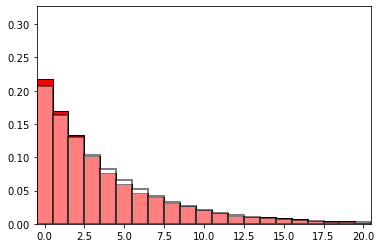

In [29]:
#Actual Data Plot
Qplot(qdata, pi)

In [30]:
qdata=Queue(P,qdata[0],10000)

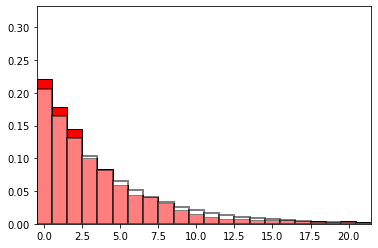

In [31]:
#Simulated Data Plot
Qplot(qdata, pi)

# Both systems tend towards 0, but the simulated one only reaches a size maximum of 10

## Q.4 (*)
### Telephone Exchange Queue.
A telephone exchange consists of $N$
operators on $N$ lines. Assume that the calling and servicing patterns are
Poisson with parameters $\alpha _{k}=\alpha ,\ \beta _{k}=k\beta $
respectively for queue size of $0\leq k\leq N$ and for some $\alpha, \beta >0$.
The equilibrium distribution for the queue is: 
$$
\pi _{k}=\frac{\rho ^{k}}{k!}\left(1+\rho +\frac{\rho ^{2}}{2!}+...+\frac{\rho
^{N}}{N!}\right)^{-1},\ \rho =\ \frac{\alpha }{\beta } 
$$
Of particular interest, in this model, is the frequency with which the
exchange becomes saturated over a long period of time i.e. $\pi_N.$ This
should be a small number for an efficient exchange since it provides a
measurement of the number of calls lost to the system.

   1. A telephone exchange has 5 operators who can handle 40 calls an hour each on average. If calls arrive at the exchange on average every 40 secs, show that there is approximately a 5.2\% chance that the exchange will become saturated after a long time.

   2. Simulate this system over 3 hours with 10 sec time intervals. For what proportion of your simulated events do you find all operators are busy?
   
   3. Compare the results of your simulation to the equilibirum probabilities $\pi_{k}$.

### Hints
Calculate $\alpha,\beta$ based on the information given for the 5 operator exchange. Be consistent with use of time units. In part (2) choose 10 secs as the time interval size and construct a transition matrix $P$ before simulating.

The factorial function in Python is computed using `math.factorial` e.g

In [32]:
def Nearneigh_2 (pup, pdown, r):
    # This generates the transition matrix P for a nearest neighbour model with 
    # maximum size r and probability pup of one step up transition and pdown 
    # for one step down transition. 
    # The output is the transition matrix P.
    P = np.zeros((r + 1, r + 1))
    P[0, 0] = 1 - pup
    P[0, 1] = pup
    P[r , r ] = 1 - r*pdown
    P[r , r - 1] = r*pdown
    for i in range(1, r):
        P[i, i - 1] = i*pdown
        P[i , i] = 1 - i*pdown - pup
        P[i , i + 1] = pup
    return(P)


In [33]:
# With 10 second intervals
prob_serv = 40/360
prob_arrive = 1/4
P = Nearneigh_2(prob_arrive, prob_serv, 5)
print(P)

[[0.75       0.25       0.         0.         0.         0.        ]
 [0.11111111 0.63888889 0.25       0.         0.         0.        ]
 [0.         0.22222222 0.52777778 0.25       0.         0.        ]
 [0.         0.         0.33333333 0.41666667 0.25       0.        ]
 [0.         0.         0.         0.44444444 0.30555556 0.25      ]
 [0.         0.         0.         0.         0.55555556 0.44444444]]


In [34]:
pi=Equilibrium(P)
print(pi)

[0.10836466 0.24382049 0.27429805 0.20572354 0.11571949 0.05207377]


### As seen above $\pi_5 \approx$ 5.2% so there is a 5.2% chance the system gets saturated

In [35]:
qdata=Queue(P,3,1080) 
print(qdata)

[3, 4, 3, 2, 2, 1, 0, 1, 2, 3, 3, 3, 4, 3, 3, 4, 3, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 4, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 3, 4, 4, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 4, 4, 3, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 2, 3, 2, 3, 4, 5, 5, 4, 4, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 2, 2, 

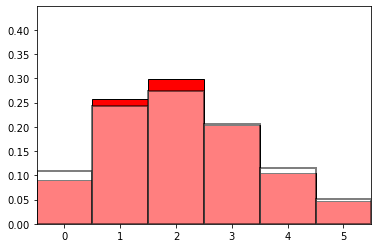

In [36]:
#Simulated Data Plot
Qplot(qdata, pi)